
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

# загрузка данных
dataset = pd.read_csv('telecom_users.csv')
dataset.drop(['Unnamed: 0', 'customerID'], axis = 1, inplace = True)

# описываем данные
print('Размерность датасета: {}'.format(dataset.shape))
print('Количество потенциальных фич: {}'.format(dataset.shape[1]))
print('Количество NaN объектов: {}'.format(dataset.isnull().sum().max()))

# преобразуем целевую переменную Churn в числовое значение
dataset['Churn'] = dataset['Churn'].map({'Yes': 1, 'No': 0})

# так как в TotalCharges есть пустые строковые значения, находим среднее и заменяем эти значения
support = []
for item in dataset['TotalCharges']:
    if len(item) > 1:
        support.append(float(item))
mean_totalCharges = np.mean(support)

# производим замену "пустых" строковых значений в TotalCharges
for index, item in enumerate(dataset['TotalCharges']):
    if len(item) <= 1:
        dataset.loc[index, 'TotalCharges'] = mean_totalCharges
        
# конвертируем столбец TotalCharges в тип float
dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

# сводим все продукты, ежемесячный платеж и отток в один датасет
test = dataset[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Churn']].copy()
# считаем количество продуктов у клиента
count = []
for row in range(len(test.index)):
    result = 0
    for column in test.columns.drop(['MonthlyCharges', 'Churn']):
        if (dataset.iloc[row][column] == 'No') or (dataset.iloc[row][column] == 'No internet service'):
            result += 0
        else:
            result += 1
    count.append(result)
    
# добавляем столбец с количеством продуктов в датасет
dataset['ProductCount'] = count

# выделяем столбцы с категориальными и метрическими переменными
metr_features_list = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ProductCount']
categorical_features_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

dataset.head()

Размерность датасета: (5986, 20)
Количество потенциальных фич: 20
Количество NaN объектов: 0


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ProductCount
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0,2
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,0,5
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1,3
3,Male,0,No,No,4,Yes,No,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,0,3
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,0,4


**Проанализируем метрические переменные**

Базовые статистики по метрическим признакам, где отток произошел

            tenure  MonthlyCharges  TotalCharges
count  1587.000000     1587.000000   1587.000000
mean     18.246377       74.164871   1550.701985
std      19.667262       24.965002   1905.709839
min       1.000000       18.850000     18.850000
25%       2.000000       55.675000    131.925000
50%      10.000000       79.500000    706.600000
75%      30.000000       94.400000   2366.775000
max      72.000000      118.350000   8684.800000 

Базовые статистики по метрическим признакам, где отток не произошел

            tenure  MonthlyCharges  TotalCharges
count  4399.000000     4399.000000   4399.000000
mean     37.599682       61.424506   2567.680565
std      24.065131       31.086101   2332.838673
min       0.000000       18.250000     18.800000
25%      15.000000       25.125000    580.450000
50%      37.000000       64.750000   1701.650000
75%      61.000000       88.700000   4284.425000
max      72.000000      118.75

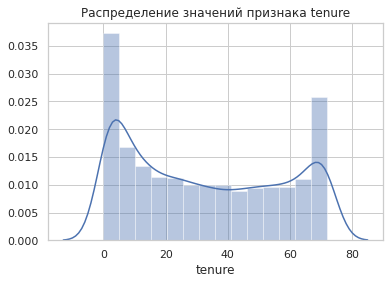

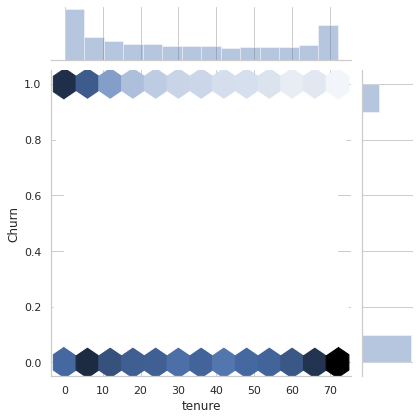

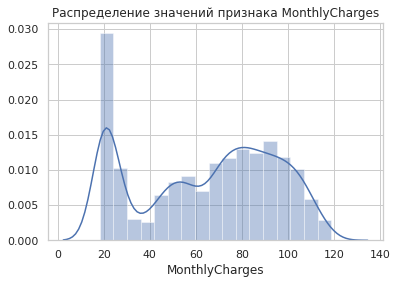

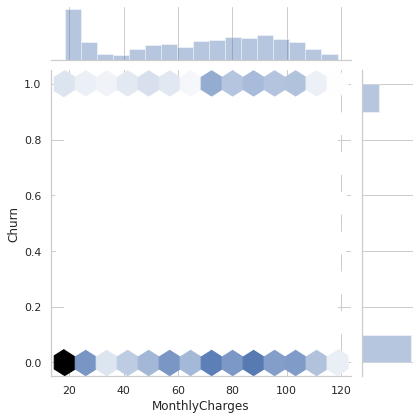

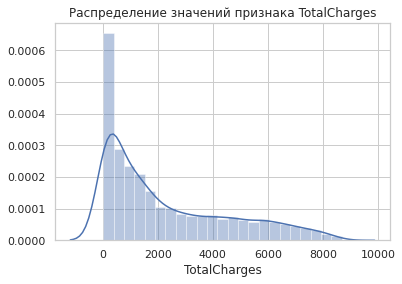

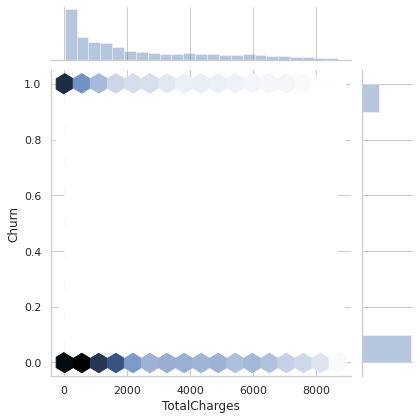

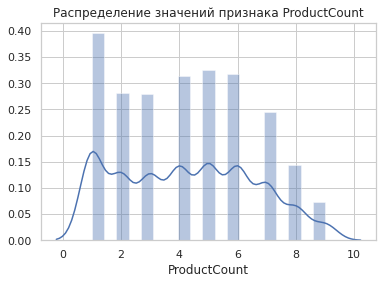

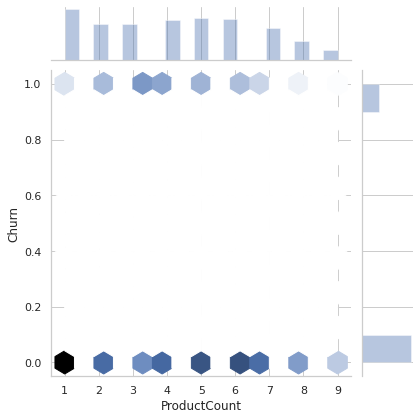

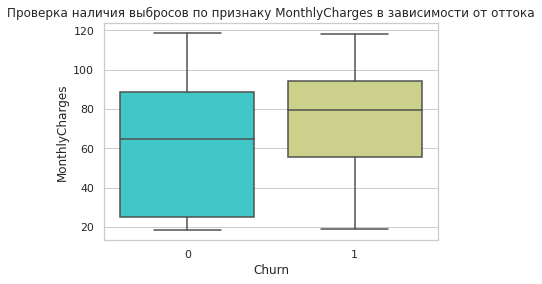

In [46]:
# выведем статистики по метрическим признакам в зависимости от оттока
print('Базовые статистики по метрическим признакам, где отток произошел\n')
print(dataset[dataset['Churn'] == 1][['tenure', 'MonthlyCharges', 'TotalCharges']].describe(), '\n')
print('Базовые статистики по метрическим признакам, где отток не произошел\n')
print(dataset[dataset['Churn'] == 0][['tenure', 'MonthlyCharges', 'TotalCharges']].describe(), '\n')

for feature in metr_features_list:
    fig, ax = plt.subplots()
    sns.distplot(dataset[feature], ax = ax)
    ax.set_title('Распределение значений признака {}'.format(feature))
    # зависимость оттока от исследуемого признака
    sns.jointplot(x = feature, y = 'Churn', data = dataset, kind = 'hex')
        
# проверим признак MonthlyCharges на наличие выбросов
fig, ax2 = plt.subplots()
ax2.set_title('Проверка наличия выбросов по признаку MonthlyCharges в зависимости от оттока')
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = dataset, palette = 'rainbow', ax = ax2)
plt.show()

**Выводы по метрическим признакам:**

- по признаку **tenure** наблюдаем наивысший отток среди клиентов, которые пользуются услугами компании менее 12 месяцев
- по признаку **MonthlyCharges** относительно высокий отток среди клиентов, с размером ежемесячного платежа от 70 до 90
- выбросы по признаку **MonthlyCharges** относительно оттока отсутствуют
- по признаку **TotalCharges** наблюдаем закономерно высокий отток при низких значениях TotalCharges, поскольку много клиентов уходит ранее 12 месяцев.
- анализируя **ProductCount**, можно заметить, что наибольший отток у клиентов, кто оформил от 2 до 4 услуг.

**Проанализируем категориальные признаки**

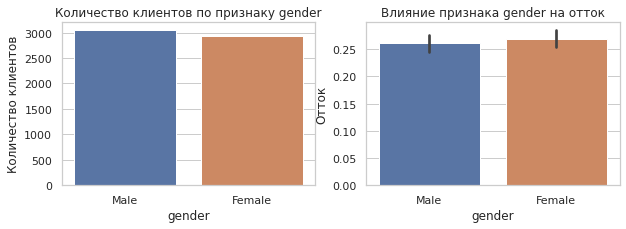

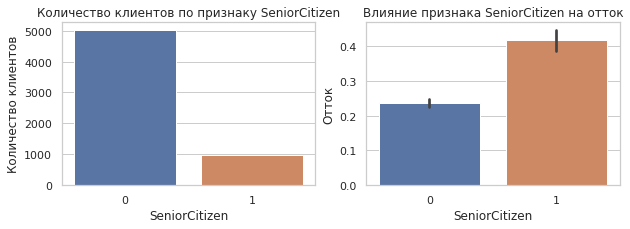

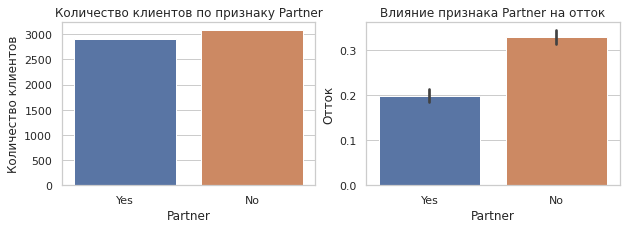

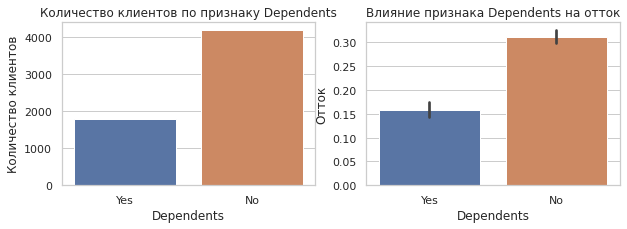

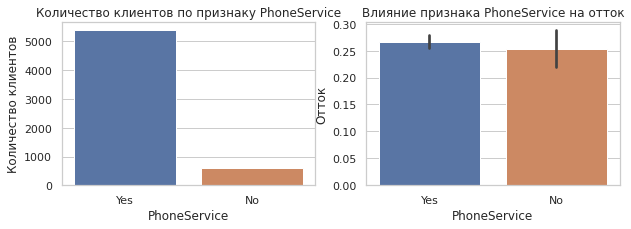

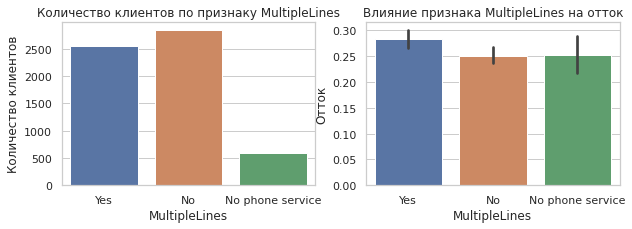

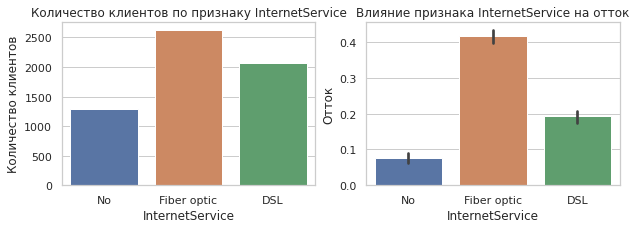

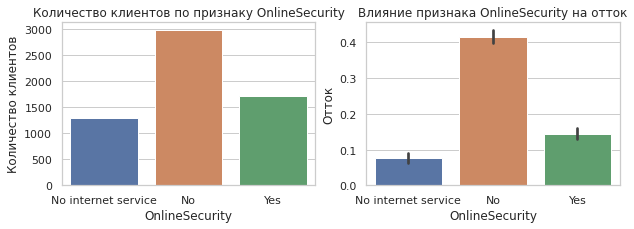

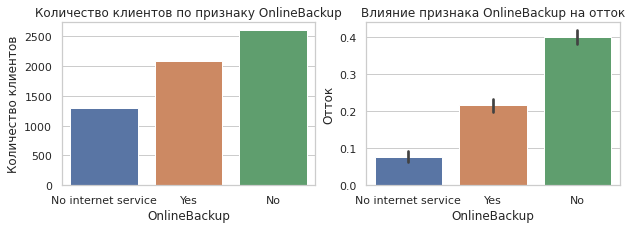

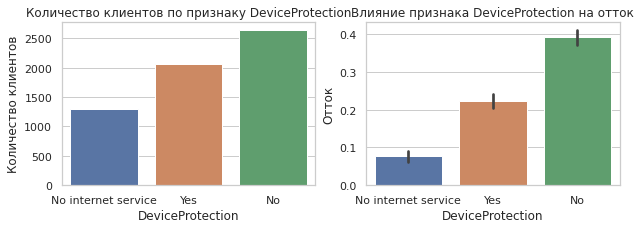

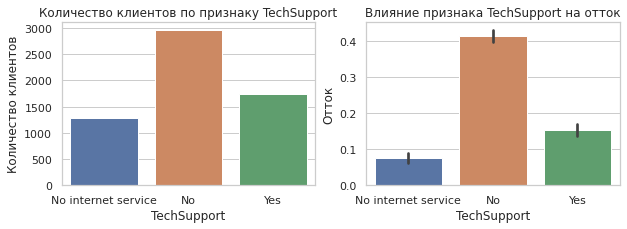

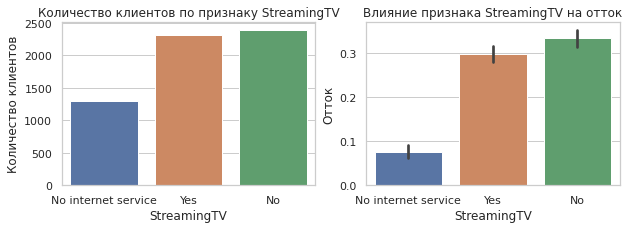

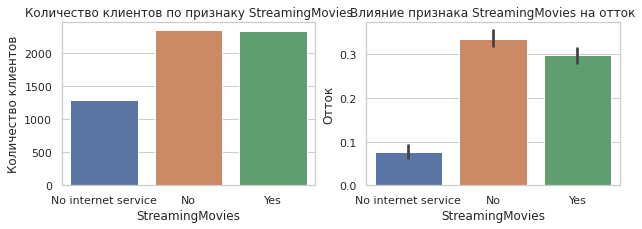

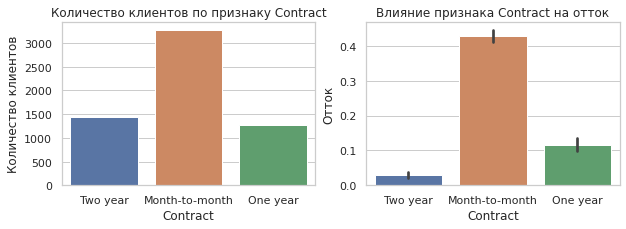

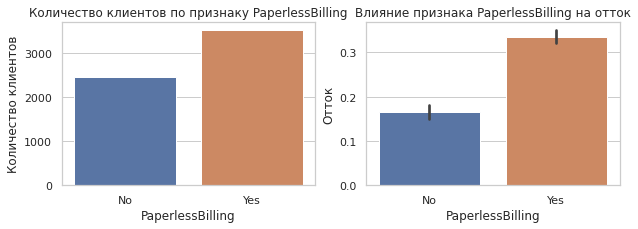

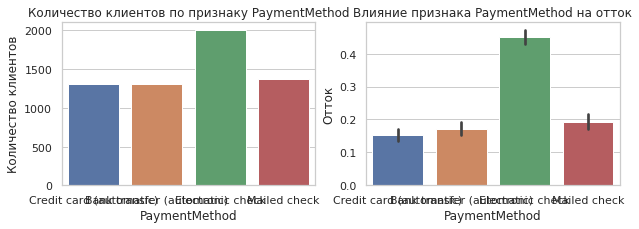

In [47]:
# оценим влияние каждого признака на отток
for feature in categorical_features_list:
    sns.set(style = 'whitegrid')
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,3))
    # первый столбец графика - количество клиентов
    sns.barplot(x = feature, y = 'Churn', data = dataset, estimator = len, ax = ax1)
    ax1.set_title('Количество клиентов по признаку {}'.format(feature))
    ax1.set_ylabel('Количество клиентов')
    # второй столбец графика - влияние элементов признака на отток
    sns.barplot(x = feature, y = 'Churn', data = dataset, ax = ax2)
    ax2.set_title('Влияние признака {} на отток'.format(feature))
    ax2.set_ylabel('Отток')
    
plt.show()

**Выводы по категориальным признакам:**

- пенсионеры и люди без семьи и детей чаще отказываются от услуг компании
- клиенты, которые пользуются услугами **StreamingTV** и **StreamingMovies** чаще отказываются от услуг компании.
- среди клиентов с автоматической системой оплаты отток значительно ниже

# 2. Исследование зависимостей и формулирование гипотез

Для исследования зависимостей необходимо перевести категориальные признаки в числовую форму

In [48]:
data = dataset.copy()
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ProductCount
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0,2
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,0,5
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1,3
3,Male,0,No,No,4,Yes,No,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,0,3
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,0,4


In [49]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
for feature in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    data[feature] = data[feature].map({'Yes': 1, 'No': 0})
for feature in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    data[feature] = data[feature].map({'Yes': 1, 'No': 0, 'No internet service': -1})
data['MultipleLines'] = data['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': -1})
data['InternetService'] = data['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
data['Contract'] = data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
data['PaymentMethod'] = data['PaymentMethod'].map({'Credit card (automatic)': 1, 'Bank transfer (automatic)': 2, 'Electronic check': 3, 'Mailed check': 4})

# разбиваем столбец tenure на 5 категорий
data.loc[data['tenure'] <= 12, 'tenure'] = 0
data.loc[(data['tenure'] > 12) & (data['tenure'] <= 24), 'tenure'] = 1
data.loc[(data['tenure'] > 24) & (data['tenure'] <=36), 'tenure'] = 2
data.loc[(data['tenure'] > 36) & (data['tenure'] <= 48), 'tenure'] = 3
data.loc[(data['tenure'] > 48) & (data['tenure'] <= 60), 'tenure'] = 4
data.loc[data['tenure'] > 60, 'tenure'] = 5

# разбиваем столбец MonthlyCharges на 5 категорий
data.loc[data['MonthlyCharges'] <= 20, 'MonthlyCharges'] = 1
data.loc[(data['MonthlyCharges'] > 20) & (data['MonthlyCharges'] <= 40), 'MonthlyCharges'] = 2
data.loc[(data['MonthlyCharges'] > 40) & (data['MonthlyCharges'] <= 60), 'MonthlyCharges'] = 3
data.loc[(data['MonthlyCharges'] > 60) & (data['MonthlyCharges'] <= 80), 'MonthlyCharges'] = 4
data.loc[data['MonthlyCharges'] > 80, 'MonthlyCharges'] = 5
data['MonthlyCharges'] = data['MonthlyCharges'].astype(int)


# разбиваем TotalCharges по 5 категориям
data.loc[data['TotalCharges'] <= 2000, 'TotalCharges'] = 1
data.loc[(data['TotalCharges'] > 2000) & (data['TotalCharges'] <= 4000), 'TotalCharges'] = 2
data.loc[(data['TotalCharges'] > 4000) & (data['TotalCharges'] <= 6000), 'TotalCharges'] = 3
data.loc[(data['TotalCharges'] > 6000) & (data['TotalCharges'] <= 8000), 'TotalCharges'] = 4
data.loc[data['TotalCharges'] > 8000, 'TotalCharges'] = 5
data['TotalCharges'] = data['TotalCharges'].astype(int)

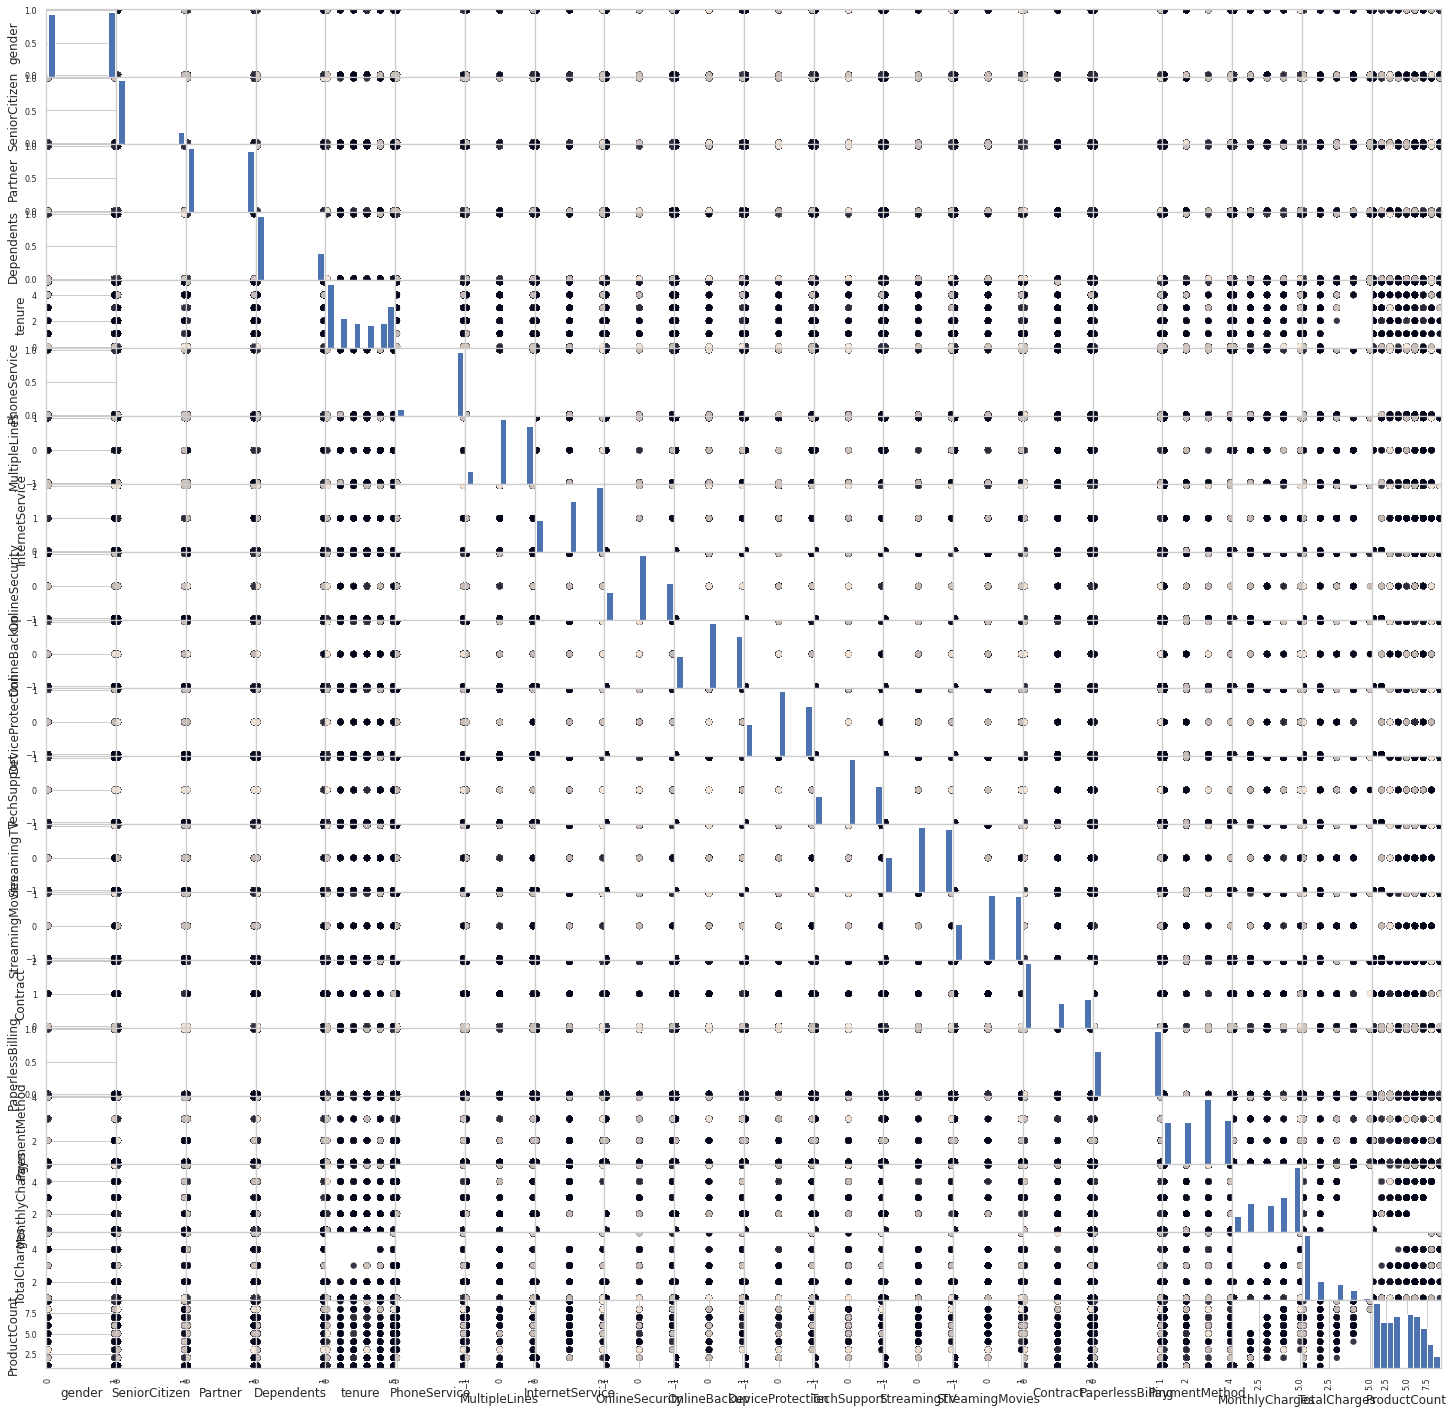

In [50]:
# строим матрицу для анализа зависимостей
scat_mtrx = pd.plotting.scatter_matrix(data.drop('Churn', axis = 1), c = data['Churn'],
                                       figsize = (25, 25), marker = 'o', s = 40, alpha = 0.8)

**Гипотеза 1 (социальная):** Отток зависит от пола, возраста(пенсионер или нет), а также от семейного положения. 

**Обоснование:** анализ графиков в пункте 1 работы показал, что влияние на отток таких параметров, как SeniorCitizen, Partner, Dependents велико. Поэтому 1 шагом будет проверка модели на данных признаках.

**Гипотеза 2 (продуктовая):** Если клиент пользуется телефоном и интернетом, но не использует другие продукты компании, вероятность ухода клиента выше.

**Обоснование:** исходя из анализа категориальных переменных в пункте 1 предполагаю, что клиенту необходимо продавать дополнительные продукты, при этом незначительно увеличив размер ежемесячного платежа. В данном случае ценность для клиента будет превышать цену, что положительно отразится на его лояльности.

# 3. Построение моделей для прогнозирования оттока

В ходе работы для прогнозирования мы будем использовать следующие модели:

- KNeighborClassifier
- GaussianNB
- DecisionTreeClassifier
- RandomForestClassifier
- LogisticRegression
- SVC
- GradientBoostingClassifier
- AdaBoostClassifier
- XGBClassifier - мета-алгоритм

Для подбора оптимальных параметров моделей будем использовать GridSearchCV.

Для оценки качества моделей примением roc_auc_score.

Входные данные мы разделим на data_train и data_test (20% от общего датасета).

- data_train - разобьем на x_train, x_test, y_train, y_test для обучения модели
- data_test - для валидации и итоговой проверки качества

In [51]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

models = [
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    LogisticRegression()
]

# подготовка входных данных
features = data.drop('Churn', axis = 1)
target = data['Churn']

data_train, data_test, targets_train, targets_test = train_test_split(features,
                                                                      target,
                                                                      test_size = 0.2,
                                                                      random_state = 17)

Преобразуем входные данные для модели с помощью onehot-кодировки (для корректной работы модели с категориальными признаками)

- data_1 - датасет для проверки гипотезы №1
- data_2 - датасет для проверки гипотезы №2

##### Переходим к проверке гипотезы 1

Тест гипотезы 1:

Обучаем модель - GradientBoostingClassifier()
Обучаем модель - RandomForestClassifier()
Обучаем модель - AdaBoostClassifier()
Обучаем модель - DecisionTreeClassifier()
Обучаем модель - KNeighborsClassifier()
Обучаем модель - GaussianNB()
Обучаем модель - SVC()
Обучаем модель - LogisticRegression()


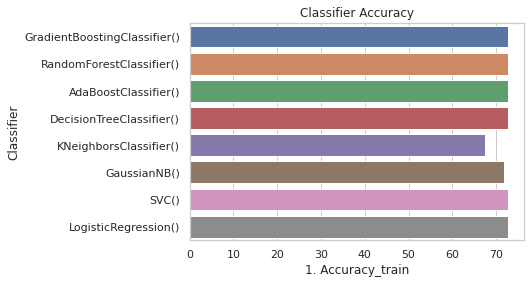

,Classifier,1. Accuracy_train,1. ROC AUC_train
0,([DecisionTreeRegressor(criterion='friedman_ms...,72.790536,0.500000
1,"(DecisionTreeClassifier(max_features='auto', r...",72.790536,0.500000
2,"(DecisionTreeClassifier(max_depth=1, random_st...",72.790536,0.500000
3,DecisionTreeClassifier(),72.790536,0.500000
4,KNeighborsClassifier(),67.501740,0.505311
5,GaussianNB(),71.746695,0.573707
6,SVC(),72.790536,0.500000
7,LogisticRegression(),72.790536,0.500000


In [52]:
print('Тест гипотезы 1:\n')
features_1 = data_train[['gender', 'SeniorCitizen', 'Partner', 'Dependents']]

# разделяем данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(features_1,
                                                    targets_train,
                                                    test_size = 0.3,
                                                    random_state = 17)

# обучаем модели, считаем точность, определяем лучшие параметры
log_1 = pd.DataFrame(columns = ['Classifier', '1. Accuracy_train', '1. ROC AUC_train'])
models_list = []
acc_list = []
roc_auc_list = []
params_list = []

for model in models:
    print('Обучаем модель - {}'.format(model))
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    models_list.append(model)
    acc_list.append(accuracy * 100)
    roc_auc_list.append(roc_auc)

log_1['Classifier'] = models_list
log_1['1. Accuracy_train'] = acc_list
log_1['1. ROC AUC_train'] = roc_auc_list

plt.title('Classifier Accuracy')
sns.barplot(x = '1. Accuracy_train', y = 'Classifier', data = log_1)
plt.show()
log_1

**Вывод по гипотезе 1:** модели выдают одинаковую точность и низкий ROC AUC, поэтому могу предположить что 4 признаков для прогнозирования результата недостаточно.

##### Переходим к проверке гипотезы 2

Тест гипотезы 2:

Обучаем модель - GradientBoostingClassifier()
Обучаем модель - RandomForestClassifier()
Обучаем модель - AdaBoostClassifier()
Обучаем модель - DecisionTreeClassifier()
Обучаем модель - KNeighborsClassifier()
Обучаем модель - GaussianNB()
Обучаем модель - SVC()
Обучаем модель - LogisticRegression()


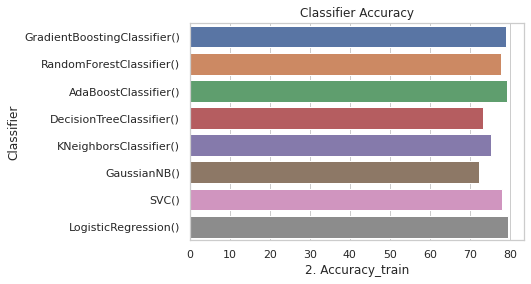

,Classifier,2. Accuracy_train,2. ROC AUC_train
0,([DecisionTreeRegressor(criterion='friedman_ms...,78.914405,0.697413
1,"(DecisionTreeClassifier(max_features='auto', r...",77.661795,0.697617
2,"(DecisionTreeClassifier(max_depth=1, random_st...",79.262352,0.700603
3,DecisionTreeClassifier(),73.138483,0.652132
4,KNeighborsClassifier(),75.156576,0.687615
5,GaussianNB(),72.233820,0.744412
6,SVC(),77.870564,0.665419
7,LogisticRegression(),79.540710,0.715328


In [53]:
print('Тест гипотезы 2:\n')

# создаем датасет для проверки гипотезы 2
features_2 = data_train.drop(features_1.columns, axis = 1)
features_2 = features_2.drop(['TotalCharges'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features_2,
                                                    targets_train, 
                                                    test_size = 0.3, 
                                                    random_state = 17)

# обучаем модели, считаем точность, определяем лучшие параметры
log_2 = pd.DataFrame(columns = ['Classifier', '2. Accuracy_train', '2. ROC AUC_train'])
models_list = []
acc_list = []
roc_auc_list = []
params_list = []

for model in models:
    print('Обучаем модель - {}'.format(model))
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    models_list.append(model)
    acc_list.append(accuracy * 100)
    roc_auc_list.append(roc_auc)
    
log_2['Classifier'] = models_list
log_2['2. Accuracy_train'] = acc_list
log_2['2. ROC AUC_train'] = roc_auc_list

plt.title('Classifier Accuracy')
sns.barplot(x = '2. Accuracy_train', y = 'Classifier', data = log_2)
plt.show()
log_2

**Выводы:** точность моделей, обученных в рамках "продуктовой" гипотезы выше, чем на отдельных "социальных" признаках.

**Гипотеза 3: Проверим качество моделей при комбинации "социальных" и "продуктовых" признаков**

Тест гипотезы 3:

Обучаем модель - GradientBoostingClassifier()
Обучаем модель - RandomForestClassifier()
Обучаем модель - AdaBoostClassifier()
Обучаем модель - DecisionTreeClassifier()
Обучаем модель - KNeighborsClassifier()
Обучаем модель - GaussianNB()
Обучаем модель - SVC()
Обучаем модель - LogisticRegression()


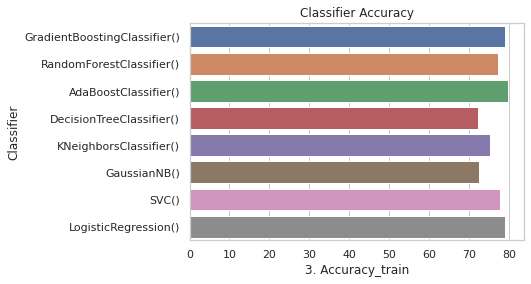

,Classifier,3. Accuracy_train,3. ROC AUC_train
0,([DecisionTreeRegressor(criterion='friedman_ms...,79.123173,0.698046
1,"(DecisionTreeClassifier(max_features='auto', r...",77.244259,0.676331
2,"(DecisionTreeClassifier(max_depth=1, random_st...",79.888657,0.713714
3,DecisionTreeClassifier(),72.164231,0.647042
4,KNeighborsClassifier(),75.295755,0.688571
5,GaussianNB(),72.512178,0.739918
6,SVC(),77.870564,0.667020
7,LogisticRegression(),79.123173,0.707655


In [54]:
print('Тест гипотезы 3:\n')

# создаем датасет для проверки гипотезы 3
features_3 = data_train

x_train, x_test, y_train, y_test = train_test_split(features_3,
                                                    targets_train, 
                                                    test_size = 0.3, 
                                                    random_state = 17)

# обучаем модели, считаем точность, определяем лучшие параметры
log_3 = pd.DataFrame(columns = ['Classifier', '3. Accuracy_train', '3. ROC AUC_train'])
models_list = []
acc_list = []
roc_auc_list = []
params_list = []

for model in models:
    print('Обучаем модель - {}'.format(model))
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    models_list.append(model)
    acc_list.append(accuracy * 100)
    roc_auc_list.append(roc_auc)
    
log_3['Classifier'] = models_list
log_3['3. Accuracy_train'] = acc_list
log_3['3. ROC AUC_train'] = roc_auc_list

plt.title('Classifier Accuracy')
sns.barplot(x = '3. Accuracy_train', y = 'Classifier', data = log_3)
plt.show()
log_3

In [55]:
print("Сводная таблица результатов обучения по гипотезам")
log = pd.DataFrame()
log['Classifier'] = models_list
log = log.merge(log_1, how = 'left').merge(log_2, how = 'left').merge(log_3, how = 'left')
log

Сводная таблица результатов обучения по гипотезам


,Classifier,1. Accuracy_train,1. ROC AUC_train,2. Accuracy_train,2. ROC AUC_train,3. Accuracy_train,3. ROC AUC_train
0,([DecisionTreeRegressor(criterion='friedman_ms...,72.790536,0.500000,78.914405,0.697413,79.123173,0.698046
1,"(DecisionTreeClassifier(max_features='auto', r...",72.790536,0.500000,77.661795,0.697617,77.244259,0.676331
2,"(DecisionTreeClassifier(max_depth=1, random_st...",72.790536,0.500000,79.262352,0.700603,79.888657,0.713714
3,DecisionTreeClassifier(),72.790536,0.500000,73.138483,0.652132,72.164231,0.647042
4,KNeighborsClassifier(),67.501740,0.505311,75.156576,0.687615,75.295755,0.688571
5,GaussianNB(),71.746695,0.573707,72.233820,0.744412,72.512178,0.739918
6,SVC(),72.790536,0.500000,77.870564,0.665419,77.870564,0.667020
7,LogisticRegression(),72.790536,0.500000,79.540710,0.715328,79.123173,0.707655


**Выводы:** после добавления "социальных" признаков к данным для обучения точность всех моделей (за исключением GaussianNB) незначительно снизилась. Предполагаю, что "социальные" признаки не только оказывают низкое влияние на отток, но еще и вносят "шум" в результаты предсказаний.

**Для теста на валидации повторно обучим модели на "продуктовых" признаках**

In [56]:
# создаем датасет для проверки гипотезы 2
x_train, x_test, y_train, y_test = train_test_split(features_2,
                                                    targets_train, 
                                                    test_size = 0.3, 
                                                    random_state = 17)
# повторно обучаем модели
for model in models:
    model.fit(x_train, y_train)

Также подготовим мета-алгоритм для тестирования на валидационных данных

In [57]:
meta_alg = XGBClassifier(random_state = 17)
meta_mtrx = np.empty((x_test.shape[0], len(models)))

for n, model in enumerate(models):
    meta_mtrx[:, n] = model.predict(x_test)
    
meta_alg.fit(meta_mtrx, y_test)
print('Мета-алгоритм обучен')

Мета-алгоритм обучен


### 4. Сравнение качества моделей 

Сравнивать качество моделей мы будем с помощью подготовленного ранее валидационного датасета data_test, targets_test

In [58]:
# в валидационном датасете выделяем "продуктовые" признаки
valid_features = data_test.drop(features_1.columns, axis = 1)
valid_features = valid_features.drop('TotalCharges', axis = 1)

# готовим датасет для отображения результата валидации
quality_df = log_2.copy()
models_list = []
acc_list = []
roc_auc_list = []

# матрица для мета-алгоритма
meta_mtrx_test = np.empty((valid_features.shape[0], len(models)))

# проверяем точность моделей 
for n, model in enumerate(models):
    predictions = model.predict(valid_features)
    meta_mtrx_test[:, n] = predictions
    accuracy = accuracy_score(targets_test, predictions)
    roc_auc = roc_auc_score(targets_test, predictions)
    models_list.append(model)
    acc_list.append(accuracy * 100)
    roc_auc_list.append(roc_auc)

quality_df['Accuracy_valid'] = acc_list
quality_df['ROC AUC_valid'] = roc_auc_list

# делаем предсказания для мета-алгоритма
meta_predictions = meta_alg.predict(meta_mtrx_test)
meta_accuracy = accuracy_score(targets_test, meta_predictions) * 100
meta_roc_auc = roc_auc_score(targets_test, meta_predictions)
quality_df.loc[quality_df.index.max() + 1] = [meta_alg, 0, 0, meta_accuracy, meta_roc_auc]

quality_df

,Classifier,2. Accuracy_train,2. ROC AUC_train,Accuracy_valid,ROC AUC_valid
0,([DecisionTreeRegressor(criterion='friedman_ms...,78.914405,0.697413,78.964942,0.691895
1,"(DecisionTreeClassifier(max_features='auto', r...",77.661795,0.697617,77.462437,0.686807
2,"(DecisionTreeClassifier(max_depth=1, random_st...",79.262352,0.700603,78.964942,0.694958
3,DecisionTreeClassifier(),73.138483,0.652132,74.290484,0.662227
4,KNeighborsClassifier(),75.156576,0.687615,75.959933,0.692952
5,GaussianNB(),72.233820,0.744412,70.701169,0.729772
6,SVC(),77.870564,0.665419,78.046745,0.662182
7,LogisticRegression(),79.540710,0.715328,79.465776,0.709587
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.000000,0.000000,78.797997,0.701994


**Вывод:** точность большинства моделей при валидации снизилась. Логистическая регрессия показала себя лучше всех в соотношении Accuracy/ROC AUC.

**Гипотеза:** применение onehot_encoder к "продуктовым" признакам повысит качество предсказаний

In [59]:
from sklearn.preprocessing import OneHotEncoder

# создаем объект OneHotEncoder
onehot = OneHotEncoder(sparse = False)

# выделяем целевые значения и признаки, согласно гипотезе 2
target = dataset['Churn']
features = dataset.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'TotalCharges', 'Churn'], axis = 1)

In [60]:
# готовим датасет с onehot-кодировкой
hot_data = features[['tenure', 'MonthlyCharges', 'ProductCount']]

hot_features_list = features.columns.drop(hot_data.columns)
for feature in hot_features_list:
    onehot_features = onehot.fit_transform(features[feature].values.reshape(-1, 1))
    tmp = pd.DataFrame(onehot_features, columns = [feature + '_' + name[3:] for name in onehot.get_feature_names()])
    hot_data = pd.concat([hot_data, tmp], axis = 1)

# разделяем данные на тренировочные и валидационные
data_train, data_test, targets_train, targets_test = train_test_split(hot_data,
                                                                      target, 
                                                                      test_size = 0.2, 
                                                                      random_state = 17)

# делим тренировочную выборку на train и test
x_train, x_test, y_train, y_test = train_test_split(data_train,
                                                    targets_train,
                                                    test_size = 0.2,
                                                    random_state = 17)

# готовим датасет для сбора результата
hot_quality = pd.DataFrame(columns = ['Classifier', 'Accuracy_train', 'ROC AUC_train', 'Accuracy_valid', 'ROC AUC_valid'])
models_list = []
acc_list = []
roc_list = []
meta_mtrx = np.empty((x_test.shape[0], len(models)))

# обучаем модели на тренировочных данных, собираем результаты
for n, model in enumerate(models):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    meta_mtrx[:, n] = predictions
    models_list.append(model)
    acc_list.append(accuracy_score(y_test, predictions) * 100)
    roc_list.append(roc_auc_score(y_test, predictions))
    
hot_quality['Classifier'] = models_list
hot_quality['Accuracy_train'] = acc_list
hot_quality['ROC AUC_train'] = roc_list

# обучаем мета-алгоритм
meta_alg.fit(meta_mtrx, y_test)

# проверяем модели на валидационных данных
acc_list = []
roc_list = []
meta_mtrx_test = np.empty((data_test.shape[0], len(models)))

for n, model in enumerate(models):
    predictions = model.predict(data_test)
    meta_mtrx_test[:, n] = predictions
    acc_list.append(accuracy_score(targets_test, predictions) * 100)
    roc_list.append(roc_auc_score(targets_test, predictions))
    
hot_quality['Accuracy_valid'] = acc_list
hot_quality['ROC AUC_valid'] = roc_list

# добавляем в датасет результаты работы мета-алгоритма
meta_predictions = meta_alg.predict(meta_mtrx_test)
meta_acc = accuracy_score(targets_test, meta_predictions)
meta_roc = roc_auc_score(targets_test, meta_predictions)
hot_quality.loc[hot_quality.index.max() + 1] = [meta_alg, 0, 0, meta_acc * 100, meta_roc]

print('Результаты работы моделей с применением onehot-кодировки')
hot_quality

Результаты работы моделей с применением onehot-кодировки


,Classifier,Accuracy_train,ROC AUC_train,Accuracy_valid,ROC AUC_valid
0,([DecisionTreeRegressor(criterion='friedman_ms...,79.540710,0.712105,79.549249,0.694837
1,"(DecisionTreeClassifier(max_features='auto', r...",76.200418,0.670274,77.629382,0.677729
2,"(DecisionTreeClassifier(max_depth=1, random_st...",80.062630,0.725095,80.550918,0.715927
3,DecisionTreeClassifier(),73.068894,0.661569,71.869783,0.641721
4,KNeighborsClassifier(),76.617954,0.682544,77.045075,0.673765
5,GaussianNB(),69.624217,0.735192,68.530885,0.730365
6,SVC(),77.139875,0.646248,79.048414,0.661829
7,LogisticRegression(),79.645094,0.722213,79.799666,0.709810
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.000000,0.000000,80.050083,0.713550


In [61]:
# объединим результаты без кодировки и с кодировкой в один датасет
result_df = quality_df[['Classifier', 'Accuracy_valid', 'ROC AUC_valid']]
result_df['Accuracy_valid HOT'] = hot_quality['Accuracy_valid']
result_df['ROC AUC_valid HOT'] = hot_quality['ROC AUC_valid']
result_df = result_df[['Classifier', 'Accuracy_valid', 'Accuracy_valid HOT', 'ROC AUC_valid', 'ROC AUC_valid HOT']]

print("Сравнение результатов работы моделей: с onehot-кодировкой и без нее")
result_df

Сравнение результатов работы моделей: с onehot-кодировкой и без нее


,Classifier,Accuracy_valid,Accuracy_valid HOT,ROC AUC_valid,ROC AUC_valid HOT
0,([DecisionTreeRegressor(criterion='friedman_ms...,78.964942,79.549249,0.691895,0.694837
1,"(DecisionTreeClassifier(max_features='auto', r...",77.462437,77.629382,0.686807,0.677729
2,"(DecisionTreeClassifier(max_depth=1, random_st...",78.964942,80.550918,0.694958,0.715927
3,DecisionTreeClassifier(),74.290484,71.869783,0.662227,0.641721
4,KNeighborsClassifier(),75.959933,77.045075,0.692952,0.673765
5,GaussianNB(),70.701169,68.530885,0.729772,0.730365
6,SVC(),78.046745,79.048414,0.662182,0.661829
7,LogisticRegression(),79.465776,79.799666,0.709587,0.709810
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",78.797997,80.050083,0.701994,0.713550


**Выводы:** точность модели на валидации при использование onehot-кодировки выше, чем без применения кодировки.

**Гипотеза:** применение GridSearchCV для топ-5 лучших по точности моделей совместно с onehot-кодировкой позволит улучшить качество предсказания

In [102]:
# выберем топ-5 моделей с наивысшим качеством
top5_df = result_df.sort_values(by = 'Accuracy_valid HOT', ascending = False).head(5).copy()
top5_df

,Classifier,Accuracy_valid,Accuracy_valid HOT,ROC AUC_valid,ROC AUC_valid HOT
2,"(DecisionTreeClassifier(max_depth=1, random_st...",78.964942,80.550918,0.694958,0.715927
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",78.797997,80.050083,0.701994,0.713550
7,LogisticRegression(),79.465776,79.799666,0.709587,0.709810
0,([DecisionTreeRegressor(criterion='friedman_ms...,78.964942,79.549249,0.691895,0.694837
6,SVC(),78.046745,79.048414,0.662182,0.661829


In [104]:
%%time
# зададим стартовые параметры моделей
ada_params = {'n_estimators': [1, 2]}
xgb_params = {'n_estimators': range(10, 100, 5), 
              'eta': np.arange(0.1, 1, 0.1), 
              'min_child_weight': range(1, 10, 1), 
              'subsample': np.arange(0.1, 1, 0.2)}
lr_params = {'C': np.arange(0.5, 1, 0.1)}
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)}
svc_params = {'kernel': ['linear', 'rbf'], 
              'C': np.arange(0.1, 1, 0.2)}

# зададим объекты GridSearchCV
skf = StratifiedKFold(n_splits = 5, random_state = 17)
ada = GridSearchCV(top5_df.iloc[0]['Classifier'], abc_params, cv = skf)
lr = GridSearchCV(top5_df.iloc[2]['Classifier'], lr_params, cv = skf)
gbc = GridSearchCV(top5_df.iloc[3]['Classifier'], gbc_params, cv = skf)
svc = GridSearchCV(top5_df.iloc[4]['Classifier'], svc_params, cv = skf)
meta_alg = GridSearchCV(top5_df.iloc[1]['Classifier'], xgb_params, cv = skf)

top_models = [ada, lr, gbc, svc]

# подготовительные данные для датасета с результатами
grid_quality_df = pd.DataFrame(columns = ['Classifier', 'BestParams', 'Accuracy_train', 'ROC AUC_train'])
models_list = []
params_list = []
acc_list = []
roc_list = []
meta_mtrx = np.empty((x_test.shape[0], len(top_models)))

# обучаем модели
for n, model in enumerate(top_models):
    print('Обучаем модель - {}'.format(model.get_params()['estimator']))
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    meta_mtrx[:, n] = predictions
    models_list.append(model.get_params()['estimator'])
    params_list.append(model.best_params_)
    acc_list.append(accuracy_score(y_test, predictions) * 100)
    roc_list.append(roc_auc_score(y_test, predictions))
    
# заполняем датасет результатами тренировки
grid_quality_df['Classifier'] = models_list
grid_quality_df['BestParams'] = params_list
grid_quality_df['Accuracy_train'] = acc_list
grid_quality_df['ROC AUC_train'] = roc_list

# обучаем мета-алгоритм
print('Обучаем мета-алгоритм')
meta_alg.fit(meta_mtrx, y_test)

# подготовительные данные для фиксации результатов
acc_list = []
roc_list = []
meta_mtrx_test = np.empty((data_test.shape[0], len(top_models)))

# проверяем точность моделей на валидационных данных
for n, model in enumerate(top_models):
    predictions = model.predict(data_test)
    meta_mtrx_test[:, n] = predictions
    acc_list.append(accuracy_score(targets_test, predictions) * 100)
    roc_list.append(roc_auc_score(targets_test, predictions))

# заполняем датасет результатами проверки на валидационных данных
grid_quality_df['Accuracy_valid HOT+GRID'] = acc_list
grid_quality_df['ROC AUC_valid HOT+GRID'] = roc_list
 
# проверяем результаты работы мета-алгоритма
meta_predictions = meta_alg.predict(meta_mtrx_test)
meta_acc = accuracy_score(targets_test, meta_predictions) * 100
meta_roc = roc_auc_score(targets_test, meta_predictions)

# добавляем результаты работы мета-алгоритма в датасет
grid_quality_df.loc[grid_quality_df.index.max() + 1] = [meta_alg.get_params()['estimator'], meta_alg.best_params_,0, 0, meta_acc, meta_roc]

print('\nОбучение моделей завершено\n')

Обучаем модель - AdaBoostClassifier()
Обучаем модель - LogisticRegression()
Обучаем модель - GradientBoostingClassifier()
Обучаем модель - SVC()
Обучаем мета-алгоритм

Обучение моделей завершено

CPU times: user 1h 19min 45s, sys: 1min, total: 1h 20min 45s
Wall time: 14min 47s


In [109]:
grid_quality_df

,Classifier,BestParams,Accuracy_train,ROC AUC_train,Accuracy_valid HOT+GRID,ROC AUC_valid HOT+GRID
0,"(DecisionTreeClassifier(max_depth=1, random_st...",{'n_estimators': 2},75.052192,0.701074,74.958264,0.700451
1,LogisticRegression(),{'C': 0.6},79.958246,0.727895,80.133556,0.717180
2,([DecisionTreeRegressor(criterion='friedman_ms...,{'learning_rate': 0.1},79.540710,0.712105,79.549249,0.694837
3,SVC(),"{'C': 0.1, 'kernel': 'linear'}",78.810021,0.707062,79.549249,0.708111
4,"XGBClassifier(base_score=0.5, booster='gbtree'...","{'eta': 0.1, 'min_child_weight': 1, 'n_estimat...",0.000000,0.000000,79.966611,0.718089


In [110]:
result_df = top5_df.merge(grid_quality_df, how = 'left')
result_df = result_df[['Classifier', 'Accuracy_valid', 'Accuracy_valid HOT', 'Accuracy_valid HOT+GRID', 'ROC AUC_valid', 'ROC AUC_valid HOT', 'ROC AUC_valid HOT+GRID']]
result_df.sort_values(by = 'Accuracy_valid HOT+GRID', ascending = False)

,Classifier,Accuracy_valid,Accuracy_valid HOT,Accuracy_valid HOT+GRID,ROC AUC_valid,ROC AUC_valid HOT,ROC AUC_valid HOT+GRID
2,LogisticRegression(),79.465776,79.799666,80.133556,0.709587,0.709810,0.717180
1,"XGBClassifier(base_score=0.5, booster='gbtree'...",78.797997,80.050083,79.966611,0.701994,0.713550,0.718089
3,([DecisionTreeRegressor(criterion='friedman_ms...,78.964942,79.549249,79.549249,0.691895,0.694837,0.694837
4,SVC(),78.046745,79.048414,79.549249,0.662182,0.661829,0.708111
0,"(DecisionTreeClassifier(max_depth=1, random_st...",78.964942,80.550918,74.958264,0.694958,0.715927,0.700451


**Выводы:** применение кросс-валидации показало результат на модели логистической регрессии.

### Общие выводы по работе:

1. На отток клиента значительно влияет то, сколько человек платит компании и сколько продуктов имеет. Оптимальное соотношение количества продуктов и размера ежемесячной оплаты положительно сказывается на лояльности клиента.
2. "Социальные" признаки, такие как пол, семейное положение, наличие детей, статус пенсионера оказывают незначительное влияние на точность модели и, как следствие, на отток.
3. Модель логистической регрессии показала себя самой лучшей среди всех. У данной модели показатели качества росли с каждой гипотезой. В продакшне для прогнозирования оттока рекомендую использовать Логистическую регрессию.
4. В связи с тем, что чаще всего от услуг компании отказываются люди со сроком сотрудничества менее 12 месяцев, предлагаю бизнес-решение: придумать ряд "стартовых пакетов" - совокупности продуктов с относительно низким общим ежемесячным платежом и высокой ценностью. Это позволит новым клиентам познакомиться с полным спектром услуг компании, улучшит их качество жизни, что повысит их лояльность в долгосрочной перспективе.